# Week 5

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Part 1

Question from DAOST
- That it's relatively easy to fit a line to the data?
- They mention weighted splines and locally weighted regression. 
- Residuals are calculate by subtracting the smoothed values from the actual values - that is, how much our smoothed curve differs from the actual data. It is a good idea to check it and even plot it, because they should be centered around zero and without a trend. If there is a trend showing, that means that the smoothing is inappropriate for the data.
- The "tube" gives us an idea about a range where most of the results lie.
- Banking changes the aspect ratio of the graph, so that the slopes make roughly 45 degrees on the plot. This way it makes it easier for us to recognize changes. However, it may hide other important information if the axes become too small in the process. 


Logarithms and logarithmic plots

- Semi-log plots make seeing relative change easier, as they are the same size.
- Log-log plots reveal power-law relationships as it plots them on a straight line.


In [3]:
data = pd.read_csv('crime.csv')

In [4]:
plot_order = data.groupby('Category').count().sort_values(by='PdId', ascending=False).index.values
plot_order

array(['LARCENY/THEFT', 'OTHER OFFENSES', 'NON-CRIMINAL', 'ASSAULT',
       'VEHICLE THEFT', 'DRUG/NARCOTIC', 'VANDALISM', 'WARRANTS',
       'BURGLARY', 'SUSPICIOUS OCC', 'ROBBERY', 'MISSING PERSON', 'FRAUD',
       'FORGERY/COUNTERFEITING', 'SECONDARY CODES', 'WEAPON LAWS',
       'TRESPASS', 'PROSTITUTION', 'STOLEN PROPERTY',
       'DISORDERLY CONDUCT', 'DRUNKENNESS', 'SEX OFFENSES, FORCIBLE',
       'RECOVERED VEHICLE', 'DRIVING UNDER THE INFLUENCE', 'KIDNAPPING',
       'ARSON', 'EMBEZZLEMENT', 'LIQUOR LAWS', 'LOITERING', 'SUICIDE',
       'BAD CHECKS', 'BRIBERY', 'EXTORTION', 'GAMBLING',
       'PORNOGRAPHY/OBSCENE MAT', 'SEX OFFENSES, NON FORCIBLE', 'TREA'],
      dtype=object)

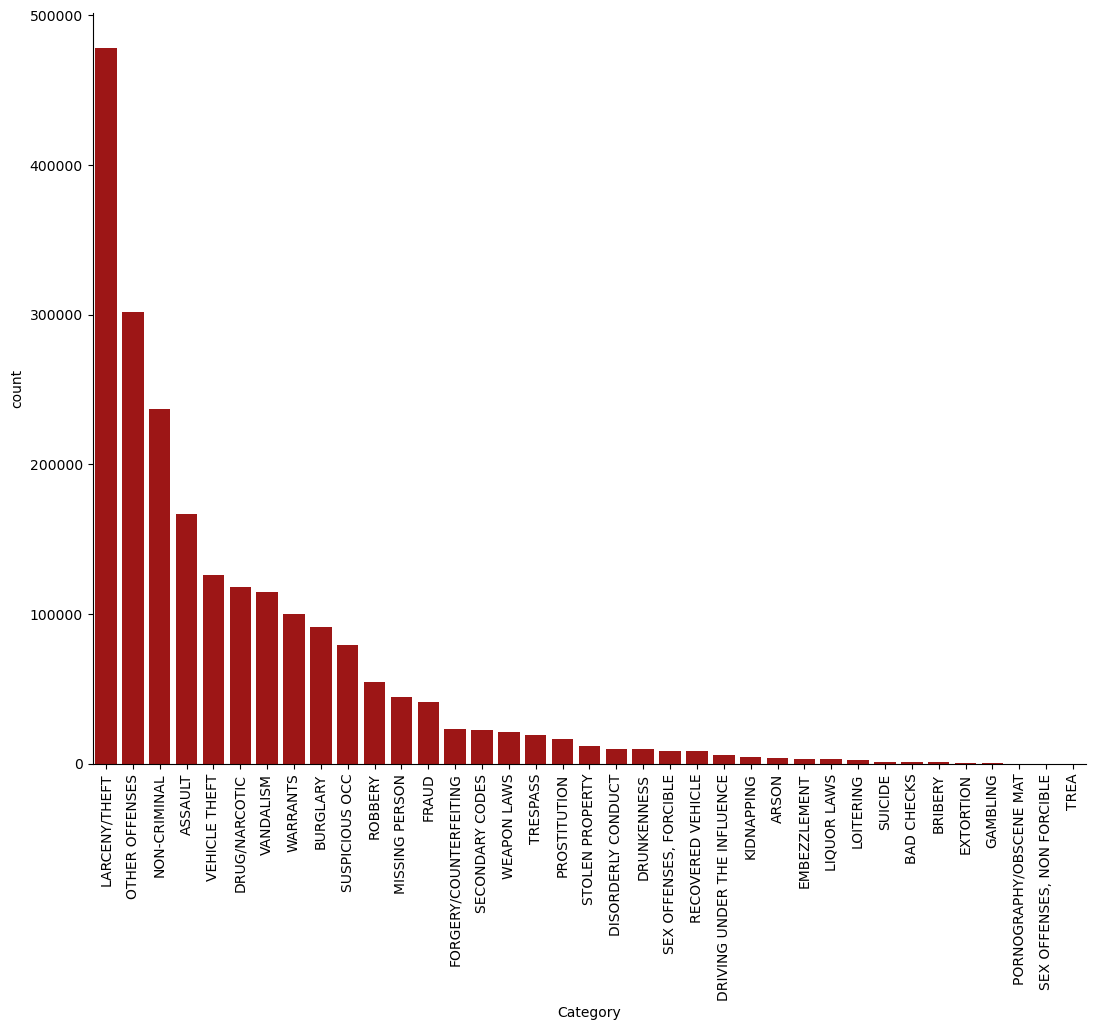

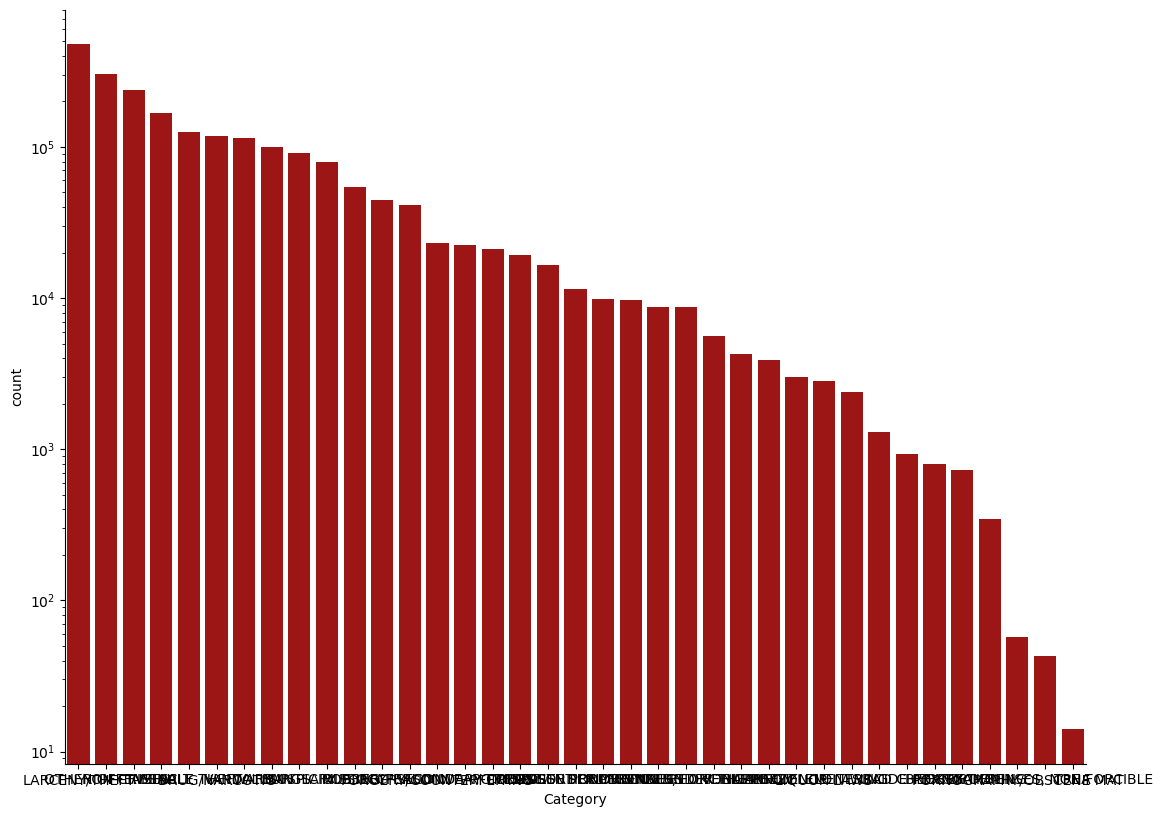

In [5]:
g = sns.catplot(data=data, kind='count', x='Category', color="#B30000", order=plot_order, height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=90)
glog = sns.catplot(data=data, kind='count', x='Category', log=True, color="#B30000", order=plot_order, height=8.27, aspect=11.7/8.27)
plt.show()

In [6]:
theftdata = data[(data.Y < 50) & (data.X<-122)]
theftdata = theftdata[theftdata['Category'] == 'LARCENY/THEFT']
count, lon, lat = np.histogram2d(theftdata.Y, theftdata.X, bins = [130,125])
print(count)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


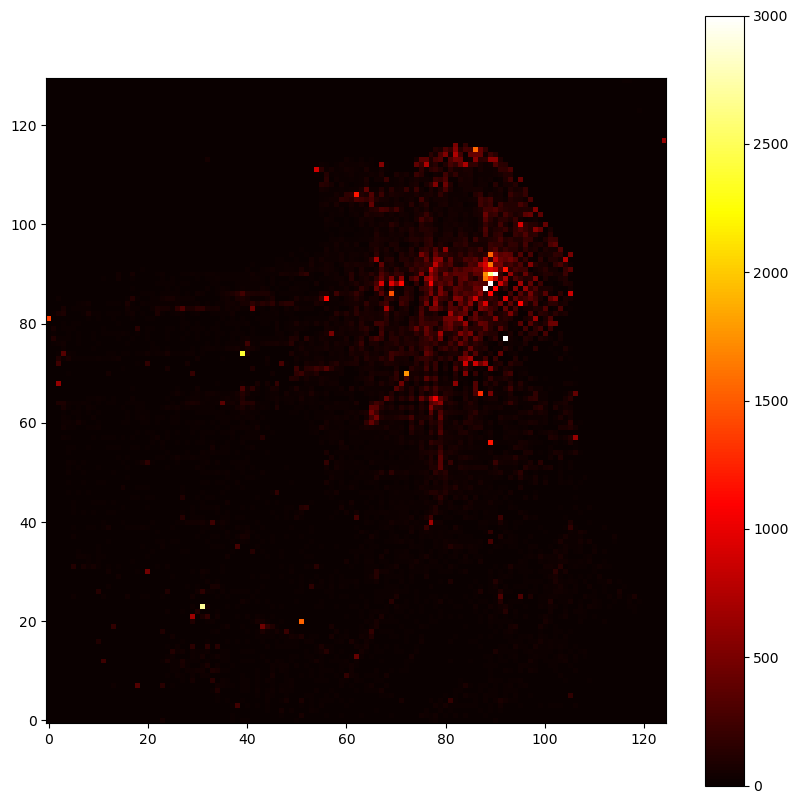

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(count, cmap='hot',vmax=3000, origin='lower')
plt.colorbar()
plt.show()

In [8]:
count.max()

17142.0

In [9]:
N = {}
for i in range(0, int(count.max()) + 1):
    N[i] = np.count_nonzero(count == i)
len(N)

17143

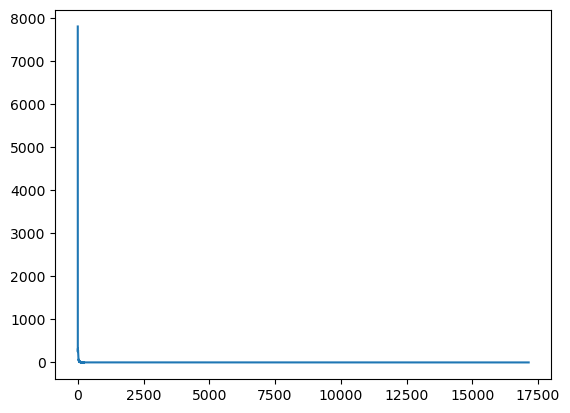

In [10]:
keys = list(N.keys())
values = [N[i] for i in keys]
sns.lineplot(x=keys, y=values)
plt.show()

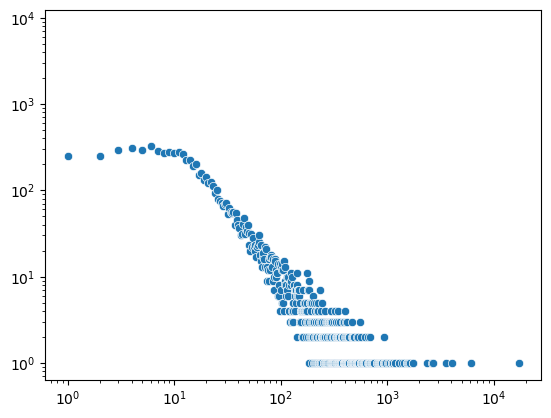

In [11]:
log = sns.scatterplot(x=keys, y=values)
log.set(yscale='log')
log.set(xscale='log')
plt.show()